In [8]:
import sys
sys.path.append('../')

import time
import numpy as np
import sympy as sy
from sympy import *


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from qsopt.search import line_search, golden_search
from qsopt.optim import powell, steepest_descent, fletcher_reeves, newton_raphson, bfgs
from qsopt.plots import plot_optim

#### Function 1

In [23]:
# function
x1, x2 = sy.symbols("x1 x2")
func = x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2
func

x1**2 - 3*x1*x2 + x1 + 4*x2**2 - x2

In [24]:
# gradient
Matrix([func]).jacobian(Matrix(list(func.free_symbols)))

Matrix([[-3*x1 + 8*x2 - 1, 2*x1 - 3*x2 + 1]])

In [25]:
sy.hessian(func, varlist=[x1, x2])

Matrix([
[ 2, -3],
[-3,  8]])

In [4]:
def f(x): 
    return x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]

def grad(x):
    return np.array([-3*x[0]+8*x[1]-1, 2*x[0]-3*x[1]+1])

hess = np.array([[-3, 8], [2, -3]])

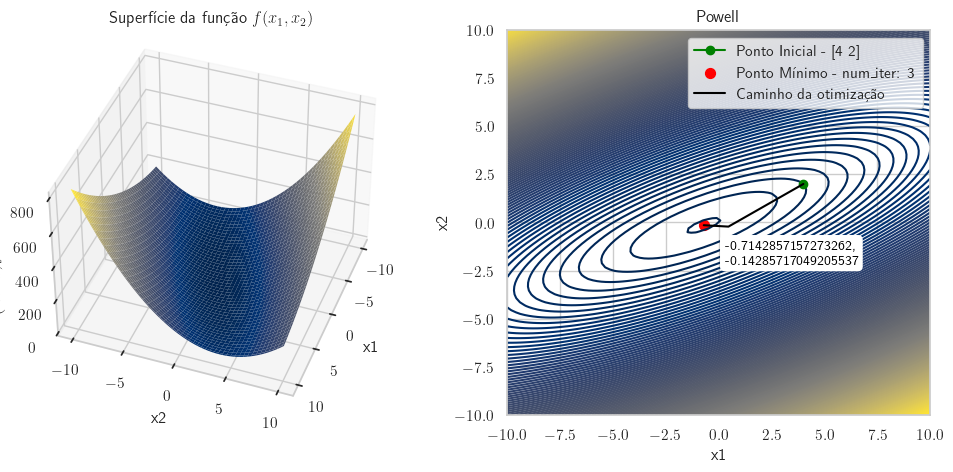

In [5]:
x0 = np.array([4,2])
method = powell(f, x0)
plot_optim(f, x0, method)

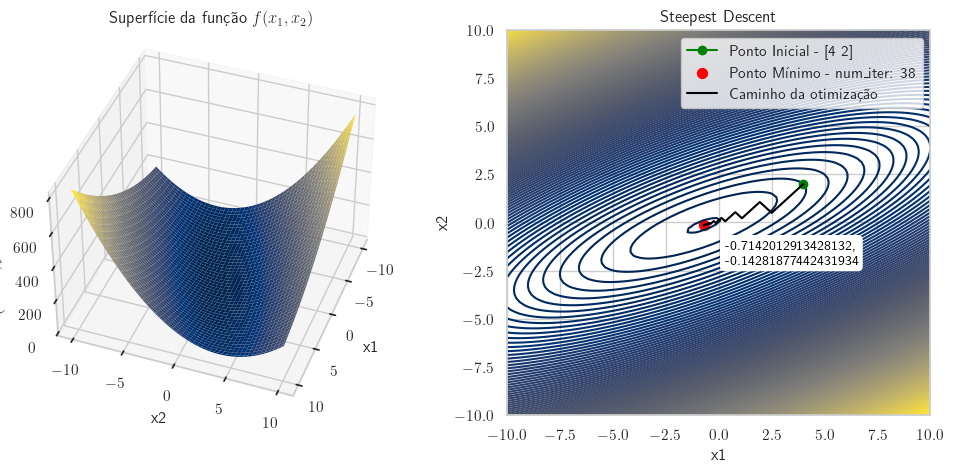

In [6]:
# steepest descent
x0 = np.array([4,2])
method = steepest_descent(f, grad, x0)
plot_optim(f, x0, method)

In [26]:
# flechter reeves
x0 = np.array([4,2])
method = fletcher_reeves(f, grad, x0)
plot_optim(f, x0, method)

IndexError: invalid index to scalar variable.

#### Function 2

In [18]:
# function
x1, x2 = sy.symbols("x1 x2")
func = (x1**2+x2-11)**2 + (x1+x2**2-7)**2
func

(x1 + x2**2 - 7)**2 + (x1**2 + x2 - 11)**2

In [19]:
# gradient
Matrix([func]).jacobian(Matrix(list(func.free_symbols)))

Matrix([[2*x1**2 + 4*x2*(x1 + x2**2 - 7) + 2*x2 - 22, 4*x1*(x1**2 + x2 - 11) + 2*x1 + 2*x2**2 - 14]])

In [21]:
sy.hessian(func, varlist=[x1, x2])

Matrix([
[12*x1**2 + 4*x2 - 42,          4*x1 + 4*x2],
[         4*x1 + 4*x2, 4*x1 + 12*x2**2 - 26]])

In [ ]:
def f(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*x[0] + 2*x[1]**2 - 14, 2*x[0]**2 + 4*x[1]*(x[0] + x[1]**2 - 7) + 2*x[1] - 22])

def hess(x):
    return np.array([[12*x[0]**2 + 4*x[1] - 42, 4*x[0] + 4*x[1]], [4*x[0] + 4*x[1], 4*x[0] + 12*x[1]**2 - 26]])

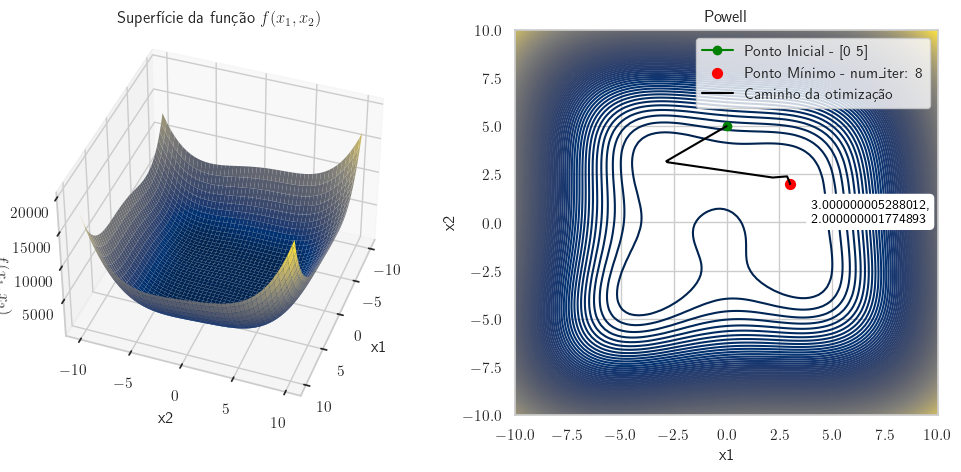

In [ ]:
# powell method
x0 = np.array([0, 5])
method = powell(f, x0)

plot_optim(f, x0, method)

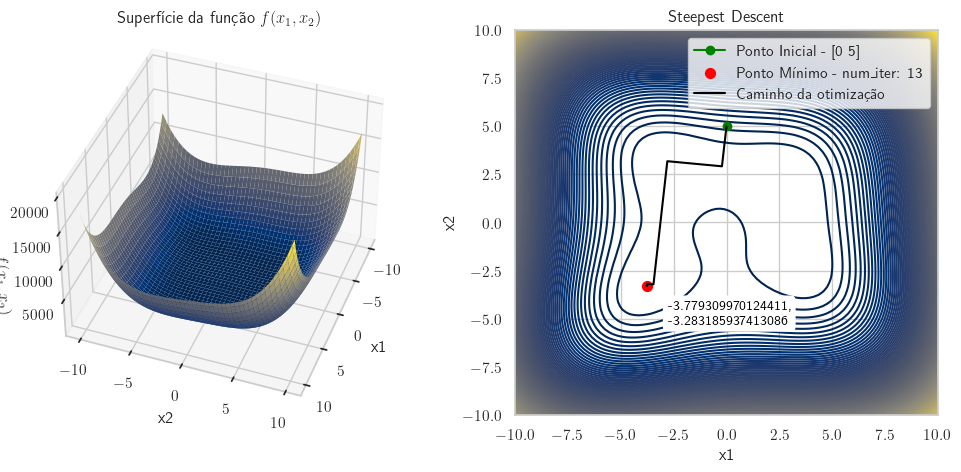

In [ ]:
# steepest descent method
x0 = np.array([0, 5])
method = steepest_descent(f, grad, x0)
plot_optim(f, x0, method)

In [ ]:
method

{'method_name': 'Steepest Descent',
 'xopt': array([-3.77930997, -3.28318594]),
 'fmin': 4.361086978517935e-12,
 'num_iter': 13,
 'path': array([[ 0.        ,  5.        ],
        [-0.21547461,  2.91707878],
        [-2.79960656,  3.18206902],
        [-3.45571712, -3.21729743],
        [-3.74944383, -3.18718347],
        [-3.75892994, -3.27928053],
        [-3.77749012, -3.27737047],
        [-3.77806296, -3.28294778],
        [-3.779199  , -3.28283094],
        [-3.7792341 , -3.28317147],
        [-3.77930346, -3.28316432],
        [-3.77930561, -3.28318511],
        [-3.77930984, -3.28318467],
        [-3.77930997, -3.28318594]])}

#### Function 3

In [27]:
# function
x1, x2 = sy.symbols("x1 x2")
func = sin(x1+x2) + (x1-x2)**2-1.5*x1+2.5*x2
func

-1.5*x1 + 2.5*x2 + (x1 - x2)**2 + sin(x1 + x2)

In [28]:
# gradient
Matrix([func]).jacobian(Matrix(list(func.free_symbols)))

Matrix([[-2*x1 + 2*x2 + cos(x1 + x2) + 2.5, 2*x1 - 2*x2 + cos(x1 + x2) - 1.5]])

In [29]:
sy.hessian(func, varlist=[x1, x2])

Matrix([
[ 2 - sin(x1 + x2), -sin(x1 + x2) - 2],
[-sin(x1 + x2) - 2,  2 - sin(x1 + x2)]])

In [30]:
def f(x):
    return np.sin(x[0]+x[1]) + (x[0]-x[1])**2-1.5*x[0]+2.5*x[1] 

def grad(x):
    return np.array([-2*x[0] + 2*x[1] + np.cos(x[0] + x[1]) + 2.5, 2*x[0] - 2*x[1] + np.cos(x[0] + x[1]) - 1.5])

def hess(x):
    return np.array([[-2*np.sin(x[0] + x[1]) - 2, -2*np.sin(x[0] + x[1]) + 2], [-2*np.sin(x[0] + x[1]) + 2, -2*np.sin(x[0] + x[1]) - 2]])

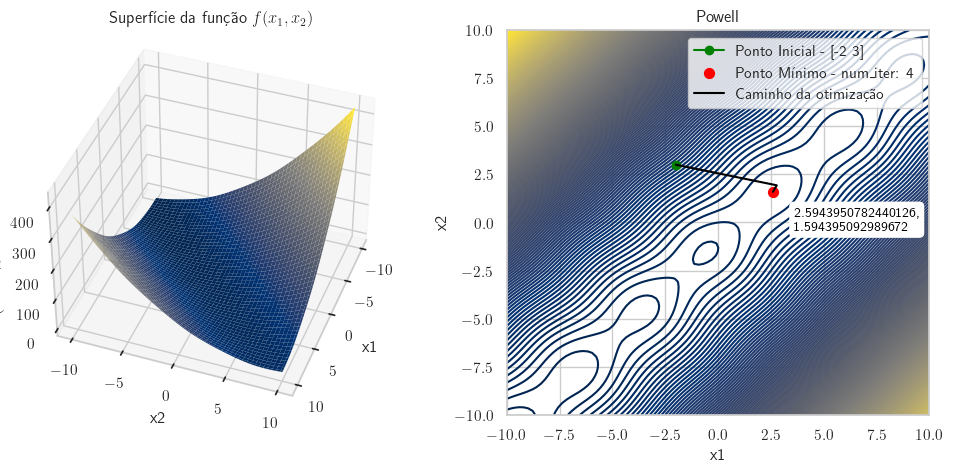

In [ ]:
# powell method
x0 = np.array([-2, 3])
method = powell(f, x0)

plot_optim(f, x0, method)

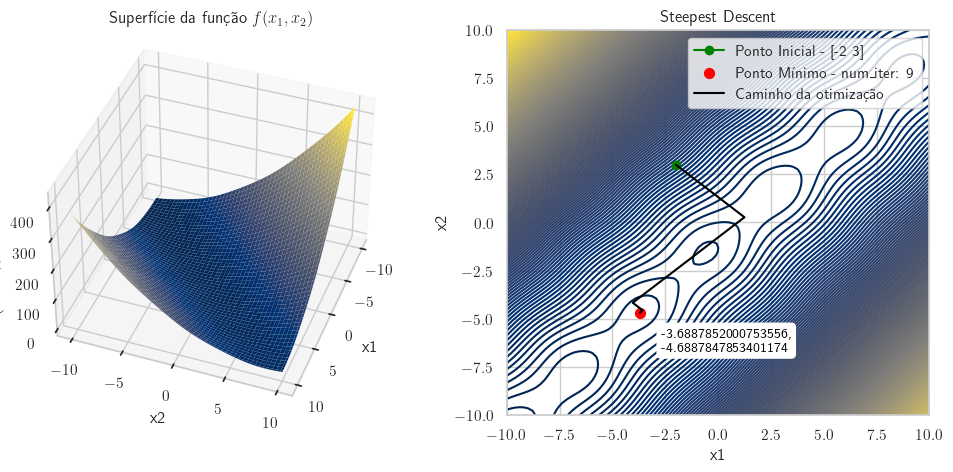

In [ ]:
# steepest descent method
x0 = np.array([-2, 3])
method = steepest_descent(f, grad, x0)
plot_optim(f, x0, method)

In [ ]:
method

{'method_name': 'Steepest Descent',
 'xopt': array([-3.6887852 , -4.68878479]),
 'fmin': -6.054815608523605,
 'num_iter': 9,
 'path': array([[-2.        ,  3.        ],
        [ 1.24705014,  0.27102278],
        [-4.03943523, -4.17149544],
        [-3.57303503, -4.56343686],
        [-3.70078859, -4.67079185],
        [-3.68466438, -4.68434151],
        [-3.68920942, -4.68816095],
        [-3.68864584, -4.68863455],
        [-3.68880491, -4.6887682 ],
        [-3.6887852 , -4.68878479]])}